<a href="https://colab.research.google.com/github/anishkuvelkar/LSTM_NIKEstock-prediction-Practice-/blob/main/LSTM_Nike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import os
import shutil

In [18]:
os.mkdir('/content/NikeShare')

FileExistsError: [Errno 17] File exists: '/content/NikeShare'

In [19]:
# Define the source file path and the destination directory
source = '/content/NKE.csv'
destination = '/content/NikeShare'

# Move the file
shutil.move(source, destination)

Error: Destination path '/content/NikeShare/NKE.csv' already exists

In [137]:
df = pd.read_csv('/content/NikeShare/NKE.csv')

In [138]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-02,0.179688,0.183594,0.179688,0.179688,0.127687,100710400
1,1980-12-03,0.177734,0.177734,0.175781,0.175781,0.124911,25177600
2,1980-12-04,0.181641,0.183594,0.181641,0.181641,0.129075,22694400
3,1980-12-05,0.175781,0.175781,0.171875,0.171875,0.122135,7590400
4,1980-12-08,0.164063,0.164063,0.162109,0.162109,0.115196,5414400


In [139]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10985,2024-07-01,75.500000,77.059998,74.290001,76.830002,76.830002,44369000
10986,2024-07-02,76.820000,76.940002,75.389999,76.040001,76.040001,26183400
10987,2024-07-03,75.500000,75.919998,75.019997,75.239998,75.239998,15952000
10988,2024-07-05,75.360001,76.089996,74.779999,75.430000,75.430000,19587200
10989,2024-07-08,75.410004,75.410004,73.000000,73.114998,73.114998,25186511


In [140]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [141]:
df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)

In [142]:
df.head()

,Date,Close
0,1980-12-02,0.179688
1,1980-12-03,0.175781
2,1980-12-04,0.181641
3,1980-12-05,0.171875
4,1980-12-08,0.162109


In [143]:
print(df['Date'].dtypes)

object


In [144]:
import datetime

In [145]:
def convert_date(s):
  split = s.split('-')
  year,month,day = int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

In [146]:
daten = convert_date('2020-01-21')
daten

datetime.datetime(2020, 1, 21, 0, 0)

In [147]:
print(convert_date('2020-01-01'))

2020-01-01 00:00:00


In [148]:
df['Date'] = df['Date'].apply(convert_date)
df['Date']

0       1980-12-02
1       1980-12-03
2       1980-12-04
3       1980-12-05
4       1980-12-08
           ...    
10985   2024-07-01
10986   2024-07-02
10987   2024-07-03
10988   2024-07-05
10989   2024-07-08
Name: Date, Length: 10990, dtype: datetime64[ns]

In [149]:
df.head()

,Date,Close
0,1980-12-02,0.179688
1,1980-12-03,0.175781
2,1980-12-04,0.181641
3,1980-12-05,0.171875
4,1980-12-08,0.162109


In [150]:
print(df['Date'].dtypes)

datetime64[ns]


In [151]:
df.index = df.pop('Date')
df.head()

,Close
Date,
1980-12-02,0.179688
1980-12-03,0.175781
1980-12-04,0.181641
1980-12-05,0.171875
1980-12-08,0.162109


In [152]:
import matplotlib.pyplot as plt

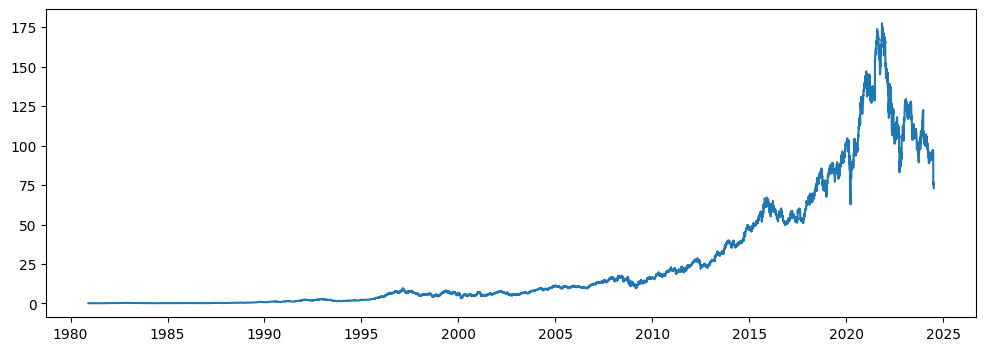

In [153]:
plt.figure(figsize=(12,4))
plt.plot(df.index,df['Close'])

#Now since we use an LSTM model, we need to convert the df into a supervised df. We need to use 3 new columns target3,target2,target1 which indidates the numebr of days prior to the the target value. Example:- Target3 is the value of the closing stock three days prior to the actual date.

In [154]:
df.shape

(10990, 1)

In [155]:
df.head()

,Close
Date,
1980-12-02,0.179688
1980-12-03,0.175781
1980-12-04,0.181641
1980-12-05,0.171875
1980-12-08,0.162109


In [156]:
import numpy as np

In [157]:
df['target3'] = np.nan
df['target2'] = np.nan
df['target1'] = np.nan
for  i in range(3,len(df)):
  df.loc[df.index[i],'target3'] = df.loc[df.index[i-3],'Close']
  df.loc[df.index[i],'target2'] = df.loc[df.index[i-2],'Close']
  df.loc[df.index[i],'target1'] = df.loc[df.index[i-1],'Close']
  df.loc[df.index[i],'target'] = df.loc[df.index[i],'Close']

In [158]:
df.head()

,Close,target3,target2,target1,target
Date,,,,,
1980-12-02,0.179688,NaN,NaN,NaN,NaN
1980-12-03,0.175781,NaN,NaN,NaN,NaN
1980-12-04,0.181641,NaN,NaN,NaN,NaN
1980-12-05,0.171875,0.179688,0.175781,0.181641,0.171875
1980-12-08,0.162109,0.175781,0.181641,0.171875,0.162109


In [159]:
df.tail()

,Close,target3,target2,target1,target
Date,,,,,
2024-07-01,76.830002,94.059998,94.190002,75.370003,76.830002
2024-07-02,76.040001,94.190002,75.370003,76.830002,76.040001
2024-07-03,75.239998,75.370003,76.830002,76.040001,75.239998
2024-07-05,75.430000,76.830002,76.040001,75.239998,75.430000
2024-07-08,73.114998,76.040001,75.239998,75.430000,73.114998


In [160]:
df = df.drop(['Close'],axis=1)

In [161]:
df.head()

,target3,target2,target1,target
Date,,,,
1980-12-02,NaN,NaN,NaN,NaN
1980-12-03,NaN,NaN,NaN,NaN
1980-12-04,NaN,NaN,NaN,NaN
1980-12-05,0.179688,0.175781,0.181641,0.171875
1980-12-08,0.175781,0.181641,0.171875,0.162109


In [162]:
for i in range(3):
    df.drop(df.index[i], axis=0, inplace=True)

In [163]:
df.head()

,target3,target2,target1,target
Date,,,,
1980-12-03,NaN,NaN,NaN,NaN
1980-12-05,0.179688,0.175781,0.181641,0.171875
1980-12-09,0.181641,0.171875,0.162109,0.158203
1980-12-10,0.171875,0.162109,0.158203,0.148438
1980-12-11,0.162109,0.158203,0.148438,0.140625


In [164]:
df.drop(df.index[0] ,axis=0, inplace=True)

In [175]:
df.head()

,target3,target2,target1,target,dates
Date,,,,,
1980-12-05,0.179688,0.175781,0.181641,0.171875,1980-12-05
1980-12-09,0.181641,0.171875,0.162109,0.158203,1980-12-09
1980-12-10,0.171875,0.162109,0.158203,0.148438,1980-12-10
1980-12-11,0.162109,0.158203,0.148438,0.140625,1980-12-11
1980-12-12,0.158203,0.148438,0.140625,0.146484,1980-12-12


In [176]:
df['dates']=df.index
df.head()

,target3,target2,target1,target,dates
Date,,,,,
1980-12-05,0.179688,0.175781,0.181641,0.171875,1980-12-05
1980-12-09,0.181641,0.171875,0.162109,0.158203,1980-12-09
1980-12-10,0.171875,0.162109,0.158203,0.148438,1980-12-10
1980-12-11,0.162109,0.158203,0.148438,0.140625,1980-12-11
1980-12-12,0.158203,0.148438,0.140625,0.146484,1980-12-12


In [177]:
df.isnull().sum()

target3    0
target2    0
target1    0
target     0
dates      0
dtype: int64

In [186]:
def changetonumpy(dataframe):
    df = dataframe.to_numpy()
    X = df[:, 1:-2]
    Y = df[:, -2]
    dates = pd.to_datetime(df[:, -1]).strftime('%Y-%m-%d')  # Convert to datetime and then to string format 'YYYY-MM-DD'
    dates_np = np.array(dates)
    return dates_np, X.astype(np.float32), Y.astype(np.float32)

dates, X, Y = changetonumpy(df)
print(dates.shape, X.shape, Y.shape)

(10986,) (10986, 2) (10986,)


In [190]:
import matplotlib.dates as mdates  # Importing matplotlib dates module for date formatting

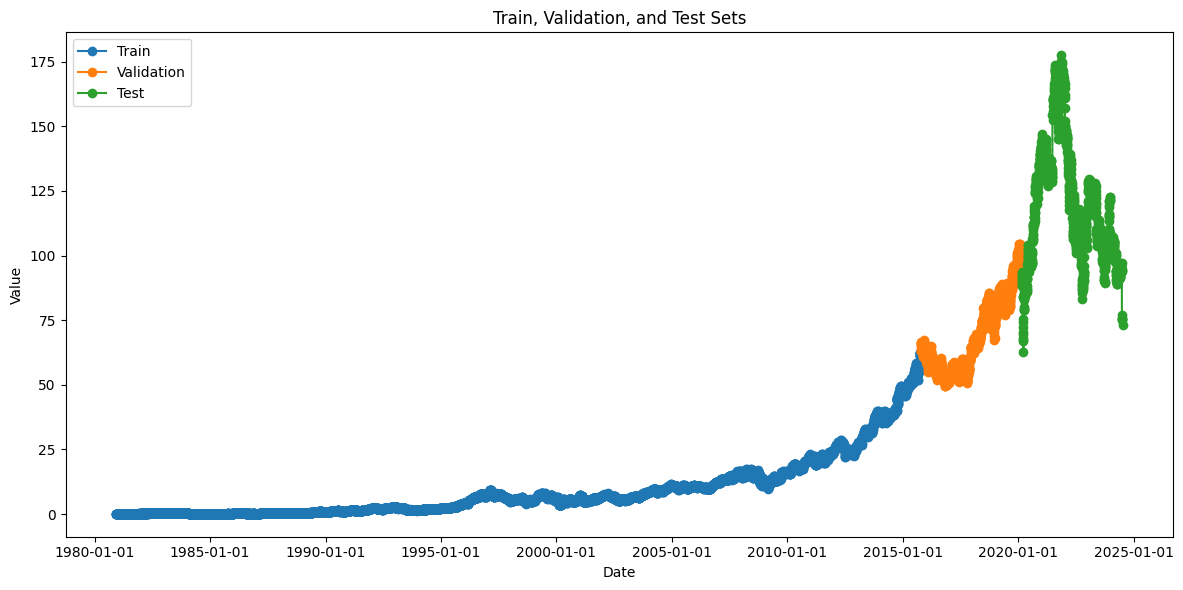

In [191]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

# Convert dates to datetime objects for plotting
dates_train_dt = pd.to_datetime(dates_train)
dates_val_dt = pd.to_datetime(dates_val)
dates_test_dt = pd.to_datetime(dates_test)

# Plotting with date formatting
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.plot(dates_train_dt, y_train, marker='o', linestyle='-', label='Train')
plt.plot(dates_val_dt, y_val, marker='o', linestyle='-', label='Validation')
plt.plot(dates_test_dt, y_test, marker='o', linestyle='-', label='Test')

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.legend(['Train', 'Validation', 'Test'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train, Validation, and Test Sets')
plt.tight_layout()  # Ensures plot elements fit within figure area
plt.show()

In [193]:
X_train.shape

(8788, 2)

In [199]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [200]:
X_train = X_train_reshaped
X_train.shape

(8788, 2, 1)

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Define the model
model = Sequential([
    layers.Input((2, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
275/275 [==============================] - 5s 8ms/step - loss: 39.7364 - mean_absolute_error: 2.1625 - val_loss: 267.7216 - val_mean_absolute_error: 11.6588
Epoch 2/100
275/275 [==============================] - 2s 6ms/step - loss: 0.1117 - mean_absolute_error: 0.1623 - val_loss: 185.7932 - val_mean_absolute_error: 9.0178
Epoch 3/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0909 - mean_absolute_error: 0.1552 - val_loss: 168.3508 - val_mean_absolute_error: 8.4908
Epoch 4/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0805 - mean_absolute_error: 0.1466 - val_loss: 149.2590 - val_mean_absolute_error: 7.8458
Epoch 5/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0862 - mean_absolute_error: 0.1518 - val_loss: 142.0002 - val_mean_absolute_error: 7.5865
Epoch 6/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0774 - mean_absolute_error: 0.1471 - val_loss: 143.0794 - val_mean_absolute_error: 7.7

275/275 [==============================] - 1s 3ms/step


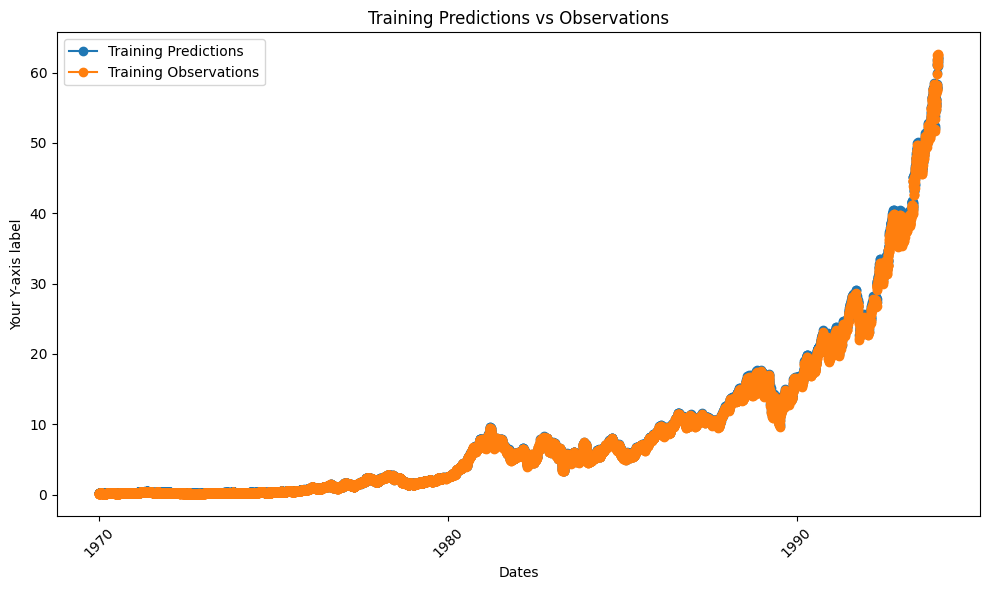

In [210]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(dates_train, train_predictions, marker='o', linestyle='-', label='Training Predictions')
plt.plot(dates_train, y_train, marker='o', linestyle='-', label='Training Observations')

plt.legend()
plt.xlabel('Dates')  # Set the label for the x-axis
plt.ylabel('Your Y-axis label')  # Set the label for the y-axis
plt.title('Training Predictions vs Observations')  # Set the plot title

# Format x-axis as dates with 10-year intervals
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=10))  # Set tick every 10 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tick labels as year

plt.xticks(rotation=45)  # Adjust rotation as needed for better visibility

plt.tight_layout()
plt.show()


In [216]:
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [217]:
X_val.shape, y_val.shape

((1099, 2, 1), (1099,))

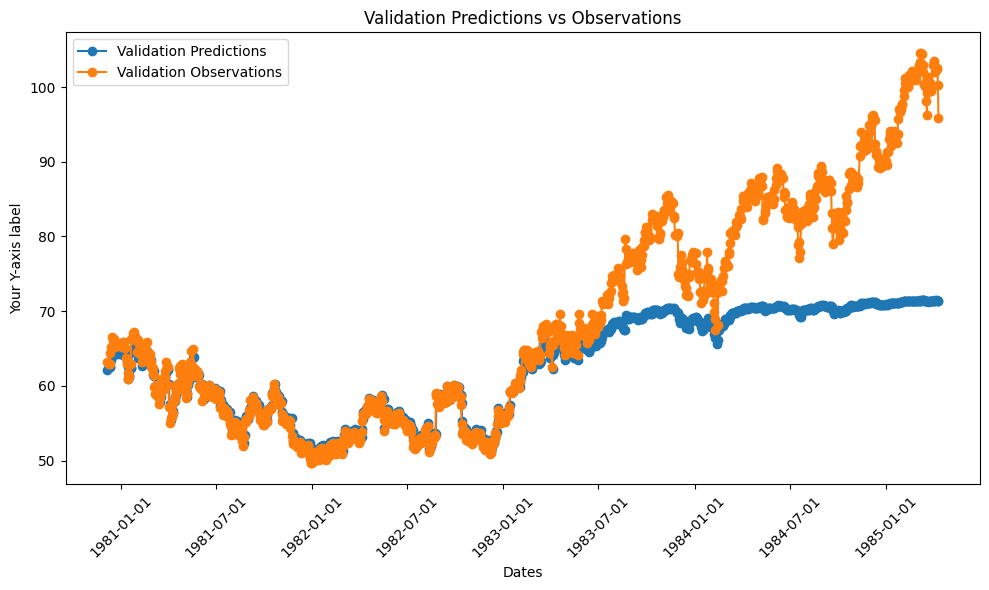

In [219]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Convert dates to datetime objects if not already
dates_val = pd.to_datetime(dates)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Assuming val_predictions and y_val are aligned correctly
plt.plot(dates_val[:1099], val_predictions[:1099], marker='o', linestyle='-', label='Validation Predictions')
plt.plot(dates_val[:1099], y_val[:1099], marker='o', linestyle='-', label='Validation Observations')

# Formatting plot
plt.legend()
plt.xlabel('Dates')  # Set the label for the x-axis
plt.ylabel('Your Y-axis label')  # Set the label for the y-axis
plt.title('Validation Predictions vs Observations')  # Set the plot title

# Formatting x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Adjust rotation as needed for better visibility

plt.tight_layout()
plt.show()



In [220]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

35/35 [==============================] - 0s 3ms/step


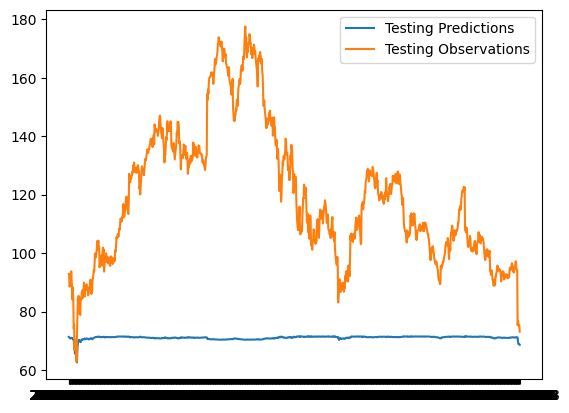

In [221]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

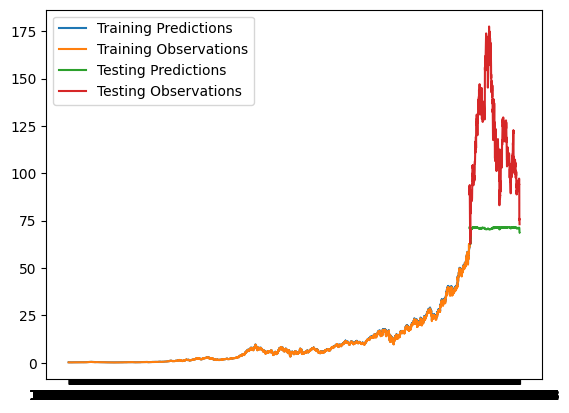

In [228]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Testing Predictions',
            'Testing Observations'])